In [30]:
# Import dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## Can we predict sales promotion by the type of product sold?

In [3]:
prod = pd.read_csv('Resources/product_data.csv')
prod

,Unnamed: 0,brand_name,food_category,food_department,food_family,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,product_id
0,0,Carrington,Breakfast Foods,Frozen Foods,Food,1.84,19.70,17.70,1,0,17,prod0
1,4,Golden,Breakfast Foods,Frozen Foods,Food,1.36,7.12,5.11,0,1,29,prod4
2,7,Imagine,Breakfast Foods,Frozen Foods,Food,1.87,16.70,14.70,1,1,10,prod7
3,9,Big Time,Breakfast Foods,Frozen Foods,Food,3.24,16.30,14.20,1,0,25,prod9
4,11,PigTail,Breakfast Foods,Frozen Foods,Food,1.64,14.10,13.10,0,1,25,prod11
...,...,...,...,...,...,...,...,...,...,...,...,...
1554,38742,Toretti,Specialty,Carousel,Non-Consumable,1.21,18.90,15.80,0,0,26,prod38742
1555,38743,Prelude,Specialty,Carousel,Non-Consumable,2.30,21.50,19.50,1,0,29,prod38743
1556,38744,Symphony,Specialty,Carousel,Non-Consumable,1.60,17.40,15.30,1,0,36,prod38744
1557,38745,ADJ,Specialty,Carousel,Non-Consumable,2.76,19.60,18.60,1,0,26,prod38745


In [4]:
prod['product_id'].nunique()

1559

In [18]:
combo = pd.read_csv('Resources/media_prediction_and_its_cost.csv')
combo

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


In [10]:
combo.groupby(['brand_name', 'food_category', 'SRP', 'food_department', 'food_family']).ngroups

1543

In [9]:
combo.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [ ]:
#filter for USA

In [20]:
#keep 'brand_name', 'food_category', 'food_department', 'food_family', 'promotion_name'
test = combo[['brand_name', 'food_category', 'food_department', 'food_family', 'promotion_name']]

test

,brand_name,food_category,food_department,food_family,promotion_name
0,Carrington,Breakfast Foods,Frozen Foods,Food,Bag Stuffers
1,Carrington,Breakfast Foods,Frozen Foods,Food,Cash Register Lottery
2,Carrington,Breakfast Foods,Frozen Foods,Food,High Roller Savings
3,Carrington,Breakfast Foods,Frozen Foods,Food,Cash Register Lottery
4,Golden,Breakfast Foods,Frozen Foods,Food,Double Down Sale
...,...,...,...,...,...
60423,ADJ,Specialty,Carousel,Non-Consumable,You Save Days
60424,Symphony,Specialty,Carousel,Non-Consumable,Price Cutters
60425,ADJ,Specialty,Carousel,Non-Consumable,Weekend Markdown
60426,ADJ,Specialty,Carousel,Non-Consumable,Sales Days


In [21]:
# Promotion as target

In [38]:
# Use LabelEncoder to encode categorical columns.
le = LabelEncoder()

test_enc = test_enc.apply(le.fit_transform)

test_enc

,brand_name,food_category,food_department,food_family,promotion_name
0,20,4,12,1,0
1,20,4,12,1,6
2,20,4,12,1,18
3,20,4,12,1,6
4,48,4,12,1,11
...,...,...,...,...,...
60423,0,42,7,2,48
60424,99,42,7,2,24
60425,0,42,7,2,47
60426,0,42,7,2,31


In [39]:
test_enc1

,brand_name,food_category,food_department,food_family,promotion_name
0,20,4,12,1,0
1,20,4,12,1,6
2,20,4,12,1,18
3,20,4,12,1,6
4,48,4,12,1,11
...,...,...,...,...,...
60423,0,42,7,2,48
60424,99,42,7,2,24
60425,0,42,7,2,47
60426,0,42,7,2,31


In [40]:
# Split preprocessed data into our features and target arrays
y = test_enc['promotion_name'].values
X = test_enc.drop(columns='promotion_name').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [41]:
# Shapes of splitted data
print(f"X_train: {X_train.shape};")
print(f"X_test: {X_test.shape};")
print(f"y_train: {y_train.shape};")
print(f"y_test: {y_test.shape};")

X_train: (45321, 4);
X_test: (15107, 4);
y_train: (45321,);
y_test: (15107,);


In [42]:
# Fit the model
mlg = LinearRegression()
mlg.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predict the result
y_pred = mlg.predict(X_test)
y_pred

array([25.65396592, 25.62169164, 25.62169164, ..., 25.61254703,
       25.26327082, 25.47272729])

In [44]:
# Evaluate the model
accuracy = r2_score(y_test, y_pred) 
print(f"Accuracy of multiple linear regression is {accuracy:.2f}.")

Accuracy of multiple linear regression is -0.00.


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

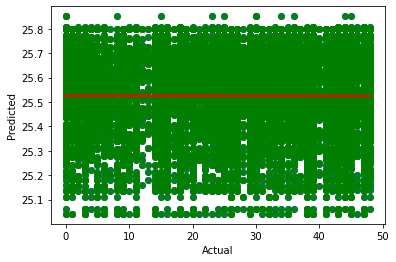

In [45]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "green"}, line_kws={"color": "red"})

### Conclusion: Type of product is not correlated to promotion

## Let's try JUST brand_name

In [47]:
test_enc1['brand_name'].nunique()

111

In [49]:
test_enc1.drop(columns=['food_category', 'food_department', 'food_family'], axis=1, inplace=True)
test_enc1

,brand_name,promotion_name
0,20,0
1,20,6
2,20,18
3,20,6
4,48,11
...,...,...
60423,0,48
60424,99,24
60425,0,47
60426,0,31


In [50]:
# Split preprocessed data into our features and target arrays
y = test_enc1['promotion_name'].values
X = test_enc1.drop(columns='promotion_name').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [51]:
#Fit the Model
mlg.fit(X_train, y_train)

LinearRegression()

In [52]:
# Evaluate the model
accuracy = r2_score(y_test, y_pred) 
print(f"Accuracy of multiple linear regression is {accuracy:.2f}.")

Accuracy of multiple linear regression is -0.00.


### Conclusion: Brand is NOT correlated to promotion type